$$Y_i = b_0 + b_1 X_i + \epsilon_i$$

In [144]:
from pandas_datareader import data

In [145]:
R = data.DataReader('AAPL', 'yahoo', start='2012/01/01', end='2018/01/01')
R.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.269413
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.544937
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,52.117188
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.662014
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.578468


In [146]:
R = R.resample('M').last().pct_change()
R.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,0.195029,0.182378,0.188700,0.188311,1.430562,0.188311
2012-03-31,0.114954,0.116184,0.124104,0.105284,-0.232112,0.105284
2012-04-30,-0.019916,-0.024986,-0.018020,-0.025970,-0.307635,-0.025970
2012-05-31,-0.028242,-0.019794,-0.028538,-0.010702,-0.028589,-0.010702


In [147]:
Rm = data.DataReader('^GSPC', 'yahoo', start='2012/01/01', end='2018/01/01')
Rm = Rm.resample('M').last().pct_change()
Rm.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,0.042856,0.043714,0.044666,0.040589,0.058273,0.040589
2012-03-31,0.023838,0.027577,0.022672,0.031332,-0.179700,0.031332
2012-04-30,-0.005408,-0.005295,-0.000036,-0.007497,-0.027980,-0.007497
2012-05-31,-0.059519,-0.068221,-0.064258,-0.062651,0.275212,-0.062651


In [148]:
Rf = data.DataReader('DGS1MO', 'fred', start='2012/01/01', end='2018/01/01')
Rf = Rf.resample('M').last()
Rf = Rf/100
Rf.head()

,DGS1MO
DATE,
2012-01-31,0.0004
2012-02-29,0.0008
2012-03-31,0.0005
2012-04-30,0.0007
2012-05-31,0.0003


In [149]:
import pandas as pd
df = pd.DataFrame({'R':R['Adj Close'], 'Rm':Rm['Adj Close'], 'Rf':Rf['DGS1MO']})
df.head()

,R,Rm,Rf
Date,,,
2012-01-31,NaN,NaN,0.0004
2012-02-29,0.188311,0.040589,0.0008
2012-03-31,0.105284,0.031332,0.0005
2012-04-30,-0.025970,-0.007497,0.0007
2012-05-31,-0.010702,-0.062651,0.0003


In [150]:
df['R-Rf'] = df['R']-df['Rf']
df.head()

,R,Rm,Rf,R-Rf
Date,,,,
2012-01-31,NaN,NaN,0.0004,NaN
2012-02-29,0.188311,0.040589,0.0008,0.187511
2012-03-31,0.105284,0.031332,0.0005,0.104784
2012-04-30,-0.025970,-0.007497,0.0007,-0.026670
2012-05-31,-0.010702,-0.062651,0.0003,-0.011002


In [151]:
df['Rm-Rf'] = df['Rm']-df['Rf']
df.head()

,R,Rm,Rf,R-Rf,Rm-Rf
Date,,,,,
2012-01-31,NaN,NaN,0.0004,NaN,NaN
2012-02-29,0.188311,0.040589,0.0008,0.187511,0.039789
2012-03-31,0.105284,0.031332,0.0005,0.104784,0.030832
2012-04-30,-0.025970,-0.007497,0.0007,-0.026670,-0.008197
2012-05-31,-0.010702,-0.062651,0.0003,-0.011002,-0.062951


$$(R-Rf) = b_0 + b_1 (Rm-Rf) + \epsilon$$

In [152]:
import statsmodels.api as sm

In [153]:
y = df['R-Rf']

In [154]:
X = df['Rm-Rf']

In [155]:
X = sm.add_constant(X)

In [156]:
model = sm.OLS(y, X, missing='drop')

In [157]:
results = model.fit()

In [158]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   R-Rf   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     21.31
Date:                Wed, 28 Aug 2019   Prob (F-statistic):           1.75e-05
Time:                        18:07:58   Log-Likelihood:                 96.616
No. Observations:                  71   AIC:                            -189.2
Df Residuals:                      69   BIC:                            -184.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050      0.008      0.639      0.525      -0.011       0.021
Rm-Rf          1.2605      0.273      4.616      0.000       0.716       1.805
==============================================================================
Omnibus:                        6.530   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.902
Skew:                          -0.558   Prob(JB):                       0.0523
Kurtosis:                       3.865   Cond. No.                         36.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# The Standard Error of Estimate

$$SEE = \Bigg( \frac{\sum_{i=1}^n (Y_i - \hat{b}_0-\hat{b}_1X_i)^2}{n-2} \Bigg)^\frac{1}{2} = \Bigg( \frac{\sum_{i=1}^n (\hat\epsilon_i)^2}{n-2} \Bigg)^\frac{1}{2}$$

In [159]:
import matplotlib.pyplot as plt
import numpy as np

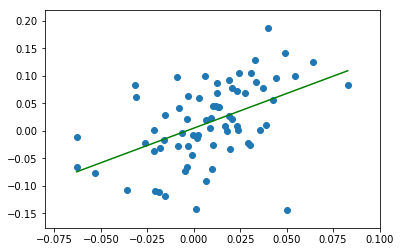

In [160]:
plt.scatter(df['Rm-Rf'], df['R-Rf'])
x_pred = np.linspace(df['Rm-Rf'].min(), df['Rm-Rf'].max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred = results.predict(x_pred2)
plt.plot(x_pred, y_pred, color='g')

In [161]:
results.params

const    0.004993
Rm-Rf    1.260523
dtype: float64

In [162]:
df['Predicted'] = results.params[0] + results.params[1]*df['Rm-Rf']
df.head()

,R,Rm,Rf,R-Rf,Rm-Rf,Predicted
Date,,,,,,
2012-01-31,NaN,NaN,0.0004,NaN,NaN,NaN
2012-02-29,0.188311,0.040589,0.0008,0.187511,0.039789,0.055149
2012-03-31,0.105284,0.031332,0.0005,0.104784,0.030832,0.043858
2012-04-30,-0.025970,-0.007497,0.0007,-0.026670,-0.008197,-0.005340
2012-05-31,-0.010702,-0.062651,0.0003,-0.011002,-0.062951,-0.074358


In [163]:
df['Predicted'] = results.predict(X)
df.head()

,R,Rm,Rf,R-Rf,Rm-Rf,Predicted
Date,,,,,,
2012-01-31,NaN,NaN,0.0004,NaN,NaN,NaN
2012-02-29,0.188311,0.040589,0.0008,0.187511,0.039789,0.055149
2012-03-31,0.105284,0.031332,0.0005,0.104784,0.030832,0.043858
2012-04-30,-0.025970,-0.007497,0.0007,-0.026670,-0.008197,-0.005340
2012-05-31,-0.010702,-0.062651,0.0003,-0.011002,-0.062951,-0.074358


In [164]:
df['RegressionResidual'] = df['R-Rf']-df['Predicted']
df.head()

,R,Rm,Rf,R-Rf,Rm-Rf,Predicted,RegressionResidual
Date,,,,,,,
2012-01-31,NaN,NaN,0.0004,NaN,NaN,NaN,NaN
2012-02-29,0.188311,0.040589,0.0008,0.187511,0.039789,0.055149,0.132362
2012-03-31,0.105284,0.031332,0.0005,0.104784,0.030832,0.043858,0.060926
2012-04-30,-0.025970,-0.007497,0.0007,-0.026670,-0.008197,-0.005340,-0.021330
2012-05-31,-0.010702,-0.062651,0.0003,-0.011002,-0.062951,-0.074358,0.063355


In [165]:
df['RegressionResidual'] = results.resid
df.head()

,R,Rm,Rf,R-Rf,Rm-Rf,Predicted,RegressionResidual
Date,,,,,,,
2012-01-31,NaN,NaN,0.0004,NaN,NaN,NaN,NaN
2012-02-29,0.188311,0.040589,0.0008,0.187511,0.039789,0.055149,0.132362
2012-03-31,0.105284,0.031332,0.0005,0.104784,0.030832,0.043858,0.060926
2012-04-30,-0.025970,-0.007497,0.0007,-0.026670,-0.008197,-0.005340,-0.021330
2012-05-31,-0.010702,-0.062651,0.0003,-0.011002,-0.062951,-0.074358,0.063355


In [166]:
df['SquaredResiduals'] = df['RegressionResidual']**2
df.head()

,R,Rm,Rf,R-Rf,Rm-Rf,Predicted,RegressionResidual,SquaredResiduals
Date,,,,,,,,
2012-01-31,NaN,NaN,0.0004,NaN,NaN,NaN,NaN,NaN
2012-02-29,0.188311,0.040589,0.0008,0.187511,0.039789,0.055149,0.132362,0.017520
2012-03-31,0.105284,0.031332,0.0005,0.104784,0.030832,0.043858,0.060926,0.003712
2012-04-30,-0.025970,-0.007497,0.0007,-0.026670,-0.008197,-0.005340,-0.021330,0.000455
2012-05-31,-0.010702,-0.062651,0.0003,-0.011002,-0.062951,-0.074358,0.063355,0.004014


In [167]:
np.sqrt(df['SquaredResiduals'].sum()/(df['SquaredResiduals'].count()-2))

0.06294792572368546

In [168]:
np.sqrt(results.scale)

0.06294792572368546

# The Coefficient of Determination

$$Total \ variation = \sum_{i=1}^n(Y_i - \bar Y_i)^2$$

$$Unexplained \ variation = \sum_{i=1}^n(Y_i - \hat Y_i)^2$$

$$ Total \ variation = Unexplained \ variation + Explained \ variation $$

$$R^2 = \frac{Total \ variation-Unexplained \ variation}{Total \ variation}$$

In [169]:
df.head()

,R,Rm,Rf,R-Rf,Rm-Rf,Predicted,RegressionResidual,SquaredResiduals
Date,,,,,,,,
2012-01-31,NaN,NaN,0.0004,NaN,NaN,NaN,NaN,NaN
2012-02-29,0.188311,0.040589,0.0008,0.187511,0.039789,0.055149,0.132362,0.017520
2012-03-31,0.105284,0.031332,0.0005,0.104784,0.030832,0.043858,0.060926,0.003712
2012-04-30,-0.025970,-0.007497,0.0007,-0.026670,-0.008197,-0.005340,-0.021330,0.000455
2012-05-31,-0.010702,-0.062651,0.0003,-0.011002,-0.062951,-0.074358,0.063355,0.004014


In [170]:
mean = df['R-Rf'].mean()
mean

0.015477447621917982

In [171]:
df['DeviationFromMean'] = df['R-Rf']-mean

In [172]:
df.head()

,R,Rm,Rf,R-Rf,Rm-Rf,Predicted,RegressionResidual,SquaredResiduals,DeviationFromMean
Date,,,,,,,,,
2012-01-31,NaN,NaN,0.0004,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,0.188311,0.040589,0.0008,0.187511,0.039789,0.055149,0.132362,0.017520,0.172034
2012-03-31,0.105284,0.031332,0.0005,0.104784,0.030832,0.043858,0.060926,0.003712,0.089306
2012-04-30,-0.025970,-0.007497,0.0007,-0.026670,-0.008197,-0.005340,-0.021330,0.000455,-0.042147
2012-05-31,-0.010702,-0.062651,0.0003,-0.011002,-0.062951,-0.074358,0.063355,0.004014,-0.026480


In [173]:
df['SquaredDeviation'] = df['DeviationFromMean']**2

In [174]:
df.head()

,R,Rm,Rf,R-Rf,Rm-Rf,Predicted,RegressionResidual,SquaredResiduals,DeviationFromMean,SquaredDeviation
Date,,,,,,,,,,
2012-01-31,NaN,NaN,0.0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-02-29,0.188311,0.040589,0.0008,0.187511,0.039789,0.055149,0.132362,0.017520,0.172034,0.029596
2012-03-31,0.105284,0.031332,0.0005,0.104784,0.030832,0.043858,0.060926,0.003712,0.089306,0.007976
2012-04-30,-0.025970,-0.007497,0.0007,-0.026670,-0.008197,-0.005340,-0.021330,0.000455,-0.042147,0.001776
2012-05-31,-0.010702,-0.062651,0.0003,-0.011002,-0.062951,-0.074358,0.063355,0.004014,-0.026480,0.000701


In [175]:
total_var = df['SquaredDeviation'].sum()
total_var

0.3578448099647086

In [176]:
unexplained_var = df['SquaredResiduals'].sum()
unexplained_var

0.2734084533511089

In [177]:
r_2 = (total_var-unexplained_var)/total_var
r_2

0.23595803058294168

# Hypothesis Testing

$$(R-Rf) = b_0 + b_1 (Rm-Rf) + \epsilon$$

$$(R-Rf) = \alpha + \beta (Rm-Rf) + \epsilon$$

# Null & Alternative Hypothesis

$$ H_0: \beta=1 $$

$$ H_a: \beta\neq1 $$

# Confidence Interval Approach

$$\hat b_1 - t_c s_{\hat b_1} \  \hat b_1 + t_c s_{\hat b_1}$$

$$ \hat b_1 \pm t_c s_{\hat b_1} $$

In [178]:
results.params

const    0.004993
Rm-Rf    1.260523
dtype: float64

In [179]:
results.bse

const    0.007808
Rm-Rf    0.273066
dtype: float64

In [180]:
dof = 71 - 2
dof

69

In [181]:
from scipy import stats
t_c = stats.t.isf(0.025, dof)
t_c

1.994945414632814

In [182]:
results.params[1] - t_c*results.bse[1]

0.7157714839882254

In [183]:
results.params[1] + t_c*results.bse[1]

1.8052746261005528

# t-test of significance

$$t = \frac {\hat b_1-b_1}{s_{\hat b_1}}$$

In [184]:
(results.params[1]-1.0)/results.bse[1]

0.9540665904997497

In [185]:
(results.params[1]-0)/results.bse[1]

4.616186207272982

# Analysis of Variance (ANOVA)

$$Sum \ of \ Squared \ Errors \ (SSE) = \sum_{i=1}^n(Y_i - \hat Y_i)^2$$


$$Regression \ Sum \ of \ Squares \ (RSS) = \sum_{i=1}^n(\hat Y_i - \bar Y_i)^2$$


$$ (Y_i - \bar Y_i) = (Y_i - \hat Y_i) + (\hat Y_i - \bar Y_i)$$

$$ TSS = SSE + RSS $$

$$F = \frac{RSS \ / \ k}{SSE \ / \ [n-(k+1)]} = \frac{Mean \ Regression \ Sum \ of \ Squares}{Mean \ Squared \ Errors} = \frac{MSR}{MSE}$$